In [1]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install yfinance
!pip install matplotlib

In [57]:
import pandas as pd
import numpy as np
import seaborn as sb
import yfinance as yf
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [3]:
ativos=['ABEV3.SA', 'AAPL34.SA', 'LREN3.SA', 'WEGE3.SA']

In [4]:
dados=yf.download(ativos, start='2015-01-01', end='2025-06-20')['Close']
dados.dropna(inplace=True, axis=1)
dados.head()

/tmp/ipython-input-4-3705639574.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  dados=yf.download(ativos, start='2015-01-01', end='2025-06-20')['Close']
[*********************100%***********************]  4 of 4 completed


Ticker,AAPL34.SA,ABEV3.SA,LREN3.SA,WEGE3.SA
Date,,,,
2015-01-02,3.281175,10.203089,9.004178,4.937981
2015-01-05,3.231038,10.018388,8.753864,4.971648
2015-01-06,3.899529,10.400525,8.854696,4.897900
2015-01-07,3.270033,10.547013,9.005364,4.841786
2015-01-08,3.335768,11.182536,9.016041,4.923553


<Axes: xlabel='Date'>

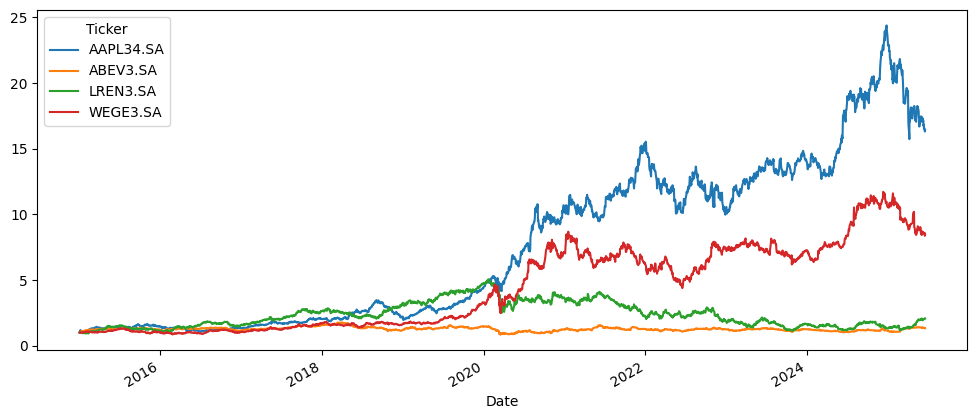

In [5]:
(dados/dados.iloc[0]).plot(figsize=(12,5))

In [6]:
matriz_retornos=dados.pct_change()
matriz_retornos.dropna(inplace=True)
matriz_retornos.head()

Ticker,AAPL34.SA,ABEV3.SA,LREN3.SA,WEGE3.SA
Date,,,,
2015-01-05,-0.015280,-0.018102,-0.027800,0.006818
2015-01-06,0.206897,0.038144,0.011519,-0.014834
2015-01-07,-0.161429,0.014085,0.017016,-0.011457
2015-01-08,0.020102,0.060256,0.001186,0.016888
2015-01-09,-0.008016,-0.002418,-0.035526,-0.004559


In [7]:
matriz_cov=matriz_retornos.cov()
matriz_cov.head()

Ticker,AAPL34.SA,ABEV3.SA,LREN3.SA,WEGE3.SA
Ticker,,,,
AAPL34.SA,0.000431,0.000024,-0.000004,0.000035
ABEV3.SA,0.000024,0.000272,0.000169,0.000119
LREN3.SA,-0.000004,0.000169,0.000664,0.000183
WEGE3.SA,0.000035,0.000119,0.000183,0.000444


In [8]:
matriz_pesos=np.random.random(len(ativos))
matriz_pesos=matriz_pesos/sum(matriz_pesos)
round(sum(matriz_pesos),2)

np.float64(1.0)

In [9]:
retornos_anuais=((dados.iloc[-1] / dados.iloc[0])**(252/len(dados))-1)
retorno_anual=np.dot(retornos_anuais, matriz_pesos)*100
print("Retorno Anual: ", round(retorno_anual, 2), "%")

Retorno Anual:  16.26 %


In [10]:
vol_anual = np.sqrt(np.dot(np.dot(matriz_pesos, matriz_cov), matriz_pesos.T)) * np.sqrt(252)
print("Volatilidade Anual: ", round(vol_anual * 100, 2), "%")

Volatilidade Anual:  20.29 %


In [92]:
#Parâmetros
portfolio_returns=[]
portfolio_volatility=[]
portfolio_weights=[]
num_ativos=len(ativos)
num_portfolios=100000

In [93]:
for portfolio in range(num_portfolios):
  weights=np.random.random(num_ativos)
  weights /= np.sum(weights)
  portfolio_weights.append(weights.copy())
  returns=np.dot(weights, retornos_anuais)*100
  portfolio_returns.append(returns)
  volatilidade=np.sqrt(np.dot(weights.T, np.dot(matriz_cov, weights)))*np.sqrt(252)*100
  portfolio_volatility.append(volatilidade)

In [94]:
portfolio={'Retornos': portfolio_returns, 'Volatilidade': portfolio_volatility}
portfolio

{'Retornos': [np.float64(15.75590508227968),
  np.float64(16.492707953333614),
  np.float64(14.48811702323198),
  np.float64(19.918114457618085),
  np.float64(13.810486815280832),
  np.float64(14.682997810351539),
  np.float64(11.275741135251513),
  np.float64(17.66785669295234),
  np.float64(16.247152356105882),
  np.float64(12.29034770623029),
  np.float64(22.356773441343016),
  np.float64(17.039195051770406),
  np.float64(16.42773029895927),
  np.float64(17.149273773098468),
  np.float64(15.259143962706887),
  np.float64(6.287559575824531),
  np.float64(17.023978863504624),
  np.float64(10.561638134165518),
  np.float64(12.63371417381446),
  np.float64(16.508474554055212),
  np.float64(19.23675689854893),
  np.float64(10.946601516242922),
  np.float64(13.014900896957183),
  np.float64(14.01482929308187),
  np.float64(15.866183078188184),
  np.float64(13.26279594688416),
  np.float64(16.61243518859638),
  np.float64(19.313888408694712),
  np.float64(17.828473344847023),
  np.float64(

In [105]:
for i, papel in enumerate(ativos):
  portfolio[papel + ' - Peso'] = [weights[i] for weight in portfolio_weights]
dataframe=pd.DataFrame(portfolio)

In [106]:
dataframe.head()

,Retornos,Volatilidade,ABEV3.SA - Peso,AAPL34.SA - Peso,LREN3.SA - Peso,WEGE3.SA - Peso
0,15.755905,24.428198,0.40131,0.108459,0.455824,0.034407
1,16.492708,21.572618,0.40131,0.108459,0.455824,0.034407
2,14.488117,22.436542,0.40131,0.108459,0.455824,0.034407
3,19.918114,21.076812,0.40131,0.108459,0.455824,0.034407
4,13.810487,23.111384,0.40131,0.108459,0.455824,0.034407


In [107]:
dataframe['Retorno sobre Risco'] = dataframe['Retornos'] / dataframe['Volatilidade']
maximo_sharpe=(dataframe.sort_values(by=['Retorno sobre Risco'], ascending=False)).iloc[0]
pesos_maximo_sharpe=list(maximo_sharpe[2:6])

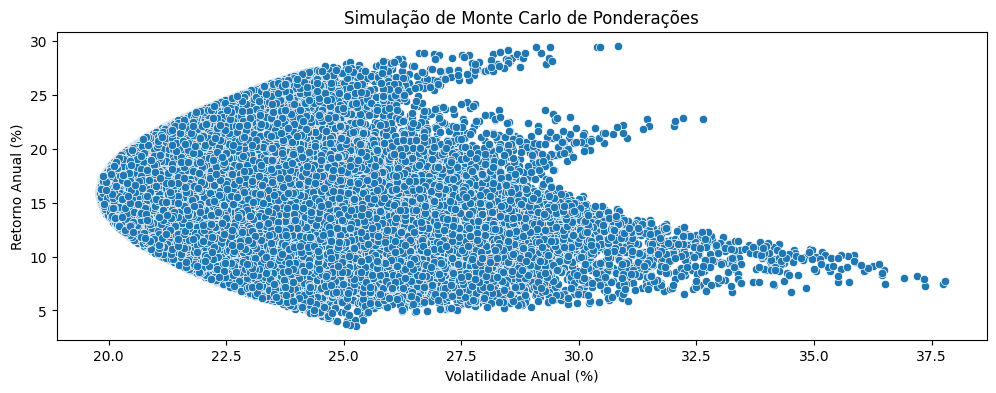

In [117]:
fig=plt.figure(figsize=(12,4))
sb.scatterplot(data=dataframe.iloc[:,0:2], x=dataframe.columns[1], y=dataframe.columns[0])
plt.title("Simulação de Monte Carlo de Ponderações")
plt.xlabel("Volatilidade Anual (%)")
plt.ylabel("Retorno Anual (%)")
plt.show()

/tmp/ipython-input-116-289414205.py:5: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-116-289414205.py:5: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  1 of 1 completed


<Axes: title={'center': 'Portfolio Máximo Sharpe Simulação vs Benchmark'}, xlabel='Date'>

<Figure size 1500x300 with 0 Axes>

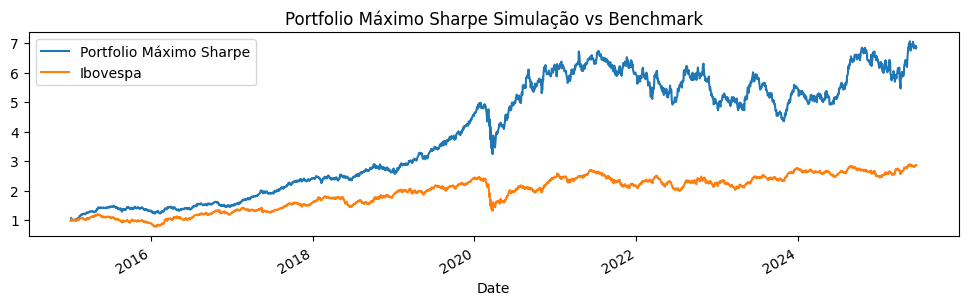

In [116]:
#Comparação da melhor ponderação com o benchmark
plt.figure(figsize=(15,3))
dataframe_comparativo = pd.DataFrame()
dataframe_comparativo['Portfolio Máximo Sharpe'] = (1+matriz_retornos.dot(pesos_maximo_sharpe)).cumprod()
dataframe_comparativo['Ibovespa'] = yf.download('^BVSP', start='2015-01-01', end='2025-06-30')['Close'] / yf.download('^BVSP', start='2015-01-01', end='2025-06-30')['Close'].iloc[0]
dataframe_comparativo.plot(figsize=(12,3), title="Portfolio Máximo Sharpe Monte Carlo vs Benchmark")